# Font-type Recognition with CNNs using Keras

In [2]:
import keras

from keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

      
print('Keras version: ',keras.__version__)

Keras version:  2.4.3


## <font color= #00cc00>Next cells load the Font Type dataset:</font>


In [3]:
"""
Load and data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
    
# Load data
data = np.load('data_with_labels.npz')

train = data['arr_0']/255.
labels = data['arr_1']

onehot= to_categorical(labels, num_classes=len(np.unique(labels)))

## Preparing Train/Test Data :
- ### Random Permutation! + split data into training / validation

In [4]:
# Split data into training (90%) and validation (10%)
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]


In [4]:
# Only for basic neural network
train=train.reshape([-1,train.shape[1]*train.shape[2]])
test=test.reshape([-1,test.shape[1]*test.shape[2]])

print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 1296) 
Test shape= (279, 1296)


In [5]:
# For CNNs
train=train.reshape([-1,train.shape[1],train.shape[2],1])
test=test.reshape([-1,test.shape[1],test.shape[2],1])

#vgg
num_classes = onehot_test.shape[1]

print('Train shape=', train.shape , '\nTest shape=', test.shape, '\nNum clasess =', num_classes)

Train shape= (2511, 36, 36, 1) 
Test shape= (279, 36, 36, 1) 
Num clasess = 5


## Try CNN / ConvNet models in Keras (remember):

1.   **Define your model**. Create a sequence and add layers.
2.   **Compile your model**. Specify loss functions and optimizers
3.   **Fit your model**. Execute the model using data.
4.   **Make predictions**. Use the model to generate predictions on new data.


## 1.   **Define your ConNet model**:

In [6]:
from keras.models import Sequential

from keras.layers import MaxPooling2D, Dropout, Dense, Flatten, Input 
#input para vgg
from keras.constraints import maxnorm #vgg

from keras.layers import Convolution2D as Conv2D

#### Reset the weights of the model

In [39]:

import tensorflow as tf
for ix, layer in enumerate(model.layers):
    if hasattr(model.layers[ix], 'kernel_initializer') and \
            hasattr(model.layers[ix], 'bias_initializer'):
        weight_initializer = model.layers[ix].kernel_initializer
        bias_initializer = model.layers[ix].bias_initializer

        old_weights, old_biases = model.layers[ix].get_weights()

        model.layers[ix].set_weights([
            weight_initializer(shape=old_weights.shape),
            bias_initializer(shape=old_biases.shape)])

  

#### Simple MPL

In [27]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(onehot_train.shape[1], activation='softmax'))

#### Simple CNN (using Sequential API)





In [7]:


model = Sequential()

# TRANSPA(41 del pptx)
# input: 36x36 images with 1 channel -> (36, 36) tensors.
# this applies 4 convolution filters of size 5x5 each.

# 4 filters for the 4 images of time 5x5 d 
model.add(Conv2D(4, (5, 5), activation='relu', input_shape=(36, 36,1)))


# especify the input shape of the first layer: shpe of the size of original img
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())#take the pooling and put them into a vector
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))




#### VGG16 (using Functional API)

In [11]:
'''
from keras.models import Model #Functional API
#  dropout rate for FC layers
dropout=0.5

# CNN architecture 
# VGG_v1 con 1x1 filters

input_image = Input(shape=(36,36,1))
x1 = Conv2D(64, (3, 3),padding='same', activation='relu')(input_image)
x1 = Conv2D(64, (3, 3),padding='same', activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1) #16x16 size

x1 = Conv2D(128, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(128, (3, 3),padding='same', activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1) #8x8

x1 = Conv2D(256, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(256, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(256, (1, 1),padding='same', activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1) #4x4

x1 = Conv2D(512, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(512, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(512, (1, 1),padding='same', activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1) #2x2

x1 = Conv2D(512, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(512, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(512, (1, 1),padding='same', activation='relu')(x1)
#añadido!
x1 = MaxPooling2D((2, 2))(x1) #1x1

x1 = Flatten()(x1)

x1=Dense(4096, activation='relu', kernel_constraint=maxnorm(3))(x1)
x=Dense(4096, activation='relu', kernel_constraint=maxnorm(3))(x1)



x=Dropout(dropout)(x)


out= Dense(num_classes, activation='softmax')(x)

model = Model(inputs = input_image, outputs = out);
'''

"\nfrom keras.models import Model #Functional API\n#  dropout rate for FC layers\ndropout=0.5\n\n# CNN architecture \n# VGG_v1 con 1x1 filters\n\ninput_image = Input(shape=(36,36,1))\nx1 = Conv2D(64, (3, 3),padding='same', activation='relu')(input_image)\nx1 = Conv2D(64, (3, 3),padding='same', activation='relu')(x1)\nx1 = MaxPooling2D((2, 2))(x1) #16x16 size\n\nx1 = Conv2D(128, (3, 3),padding='same', activation='relu')(x1)\nx1 = Conv2D(128, (3, 3),padding='same', activation='relu')(x1)\nx1 = MaxPooling2D((2, 2))(x1) #8x8\n\nx1 = Conv2D(256, (3, 3),padding='same', activation='relu')(x1)\nx1 = Conv2D(256, (3, 3),padding='same', activation='relu')(x1)\nx1 = Conv2D(256, (1, 1),padding='same', activation='relu')(x1)\nx1 = MaxPooling2D((2, 2))(x1) #4x4\n\nx1 = Conv2D(512, (3, 3),padding='same', activation='relu')(x1)\nx1 = Conv2D(512, (3, 3),padding='same', activation='relu')(x1)\nx1 = Conv2D(512, (1, 1),padding='same', activation='relu')(x1)\nx1 = MaxPooling2D((2, 2))(x1) #2x2\n\nx1 = Conv2

## 2.   **Compile your model**. Specify loss functions and optimizers

In [8]:
from keras.optimizers import SGD


model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [9]:
model.summary() #dense layer la que mas param tiene entrenados

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 4)         104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 33,069
Trainable params: 33,069
Non-trainable params: 0
____________________________________________________

# 3.   **Fit your model**. Train the model using data.

In [10]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
history=model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

Epoch 1/100
20/20 [==============================] - 6s 22ms/step - loss: 1.6022 - accuracy: 0.2551 - val_loss: 1.5206 - val_accuracy: 0.3262
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 1.4636 - accuracy: 0.3519 - val_loss: 1.2646 - val_accuracy: 0.5054
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 1.1984 - accuracy: 0.4927 - val_loss: 1.0137 - val_accuracy: 0.5484
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0025 - accuracy: 0.5550 - val_loss: 0.9185 - val_accuracy: 0.5699
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9187 - accuracy: 0.5811 - val_loss: 0.8359 - val_accuracy: 0.6452
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8909 - accuracy: 0.6012 - val_loss: 0.7756 - val_accuracy: 0.6595
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8324 - accuracy: 0.6292 - val_loss: 0.7388 - val_accuracy: 0.6774
Epoch 8/100


## Note:
* another possibility is just specify  $validation\_split$ = 0.10 ... so that 10% (or the % you indicate) of training data is used for validation



In [ ]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
'''
history=model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_split = 0.10,
         verbose=1)
'''

## 4.   **Make predictions**. Use the model to generate predictions on new data.

In [31]:
# Check accuracy on train set

loss_train, accuracy_train = model.evaluate(train, onehot_train, batch_size=128)


print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model.evaluate(test, onehot_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

20/20 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000

Training Accuracy= 1.0
3/3 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8889

Test Accuracy= 0.8888888955116272


In [32]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Train Accuracy:  1.0
Test Accuracy:  0.89


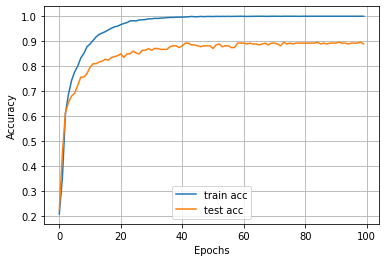

In [35]:
print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc', 'test acc'], loc='lower center')
plt.grid()


In [ ]:
# Plot the loss curves

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train loss', 'test loss'], loc='upper center')
plt.grid()

Train Accuracy:  1.0
Test Accuracy:  0.89


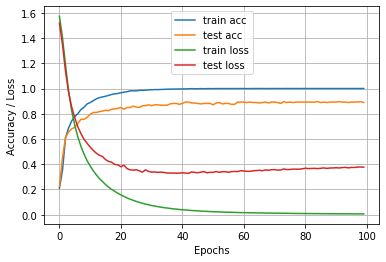

In [36]:
print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend(['train acc', 'test acc','train loss', 'test loss'], loc='upper center')
plt.grid()

# Get predictions / probabilities ...

In [37]:
pred_probabilities= model.predict(test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',onehot_test[0:5])

First Five Probs.:
 [[1.0838400e-04 3.7326000e-03 2.6957310e-05 3.3089304e-03 9.9282312e-01]
 [1.8430403e-01 8.0851877e-01 7.1092364e-03 2.7485334e-05 4.0481005e-05]
 [1.2121540e-08 1.1402071e-02 5.2938594e-14 5.6566182e-04 9.8803222e-01]
 [5.8316785e-01 1.7786231e-04 4.1661614e-01 1.1992118e-05 2.6198690e-05]
 [1.0628318e-06 1.0022006e-04 6.0325289e-18 8.7364334e-01 1.2625529e-01]]


First Five Classes:
 [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


## Confusion Matrix

Confusion Matrix:
 [[51  2  6  0  2]
 [ 4 59  5  0  3]
 [ 5  1 42  0  0]
 [ 0  0  0 42  1]
 [ 0  1  0  1 54]]


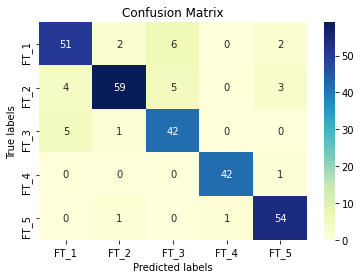

In [38]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);